<a href="https://colab.research.google.com/github/mgite03/bu-ai4all-2019/blob/main/ai-basics/Copy_of_Practice_Problems_Lesson_8__Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Problems
## Lesson 8: Neural Networks
---
Created by Terron Ishihara

### Practice Problem

Let's explore neural networks using scikit-learn's Multi-layer Perceptron (basically another name for a neural net). Naturally, we will use the MNIST hand-written digits dataset, which is essentially the "hello world" example for neural network classification.

> Start by importing the dataset. This may take a little while since the dataset is a little larger than the ones we've used in past problems.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / X.max()

# Partition the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

> Each data point is a 28x28 matrix of grayscale values. Let's visualize this by plotting these values, using the first digit as an example. Feel free to change the index into X to see what other digits are in the dataset.

<Figure size 432x288 with 0 Axes>

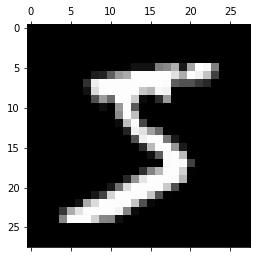

In [ ]:
import matplotlib.pyplot as plt

plt.gray() 

# Since each data point is stored in a list of 784 values, we have
# to reshape the list into a 28x28 array.
digit = X[0].reshape(28,28)
plt.matshow(digit)
plt.show()

> Now we can initialize the classifier, train it, and observe how well the classifier works on our test set. 

> The `hidden_layer_sizes` parameter accepts a tuple that specifies the number of hidden layers and the number of neurons per layer. The `solver` parameter specifies that we'll use Stochastic Gradient Descent.

> * `hidden_layer_sizes`: The number of hidden layers and number of neurons per layer. For example, the tuple (64, 32, 16) represents 3 hidden layers, with 64, 32, and 16 neurons, respectively.
> * `solver`: The solver for weight optimization. We learned about Stochastic Gradient Descent, so we use that here.
> * `activation`: The activation function for the hidden layers. Possible values are `'identity'`, `'logistic'`, `'tanh'`, and `'relu'`.
> * `max_iter`: The maximum number of iterations (updates) to perform. Ideally, the weights will converge, meaning the updates hardly change the weights. Keeping this value low will prevent the code from taking a long time (but may sacrifice accuracy).

> The setup provided below is not very accurate at predicting on the test set. Go ahead and run the code to see the resulting score. 

> Try changing the parameters for the classifier and see how it affects the score. (`solver` needn't be changed since stochastic gradient descent is the only solver we learned about.) For example, which activation function that we mentioned in the lesson may be very effective?

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the classifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(6,), 
    solver='sgd', 
    activation='relu',
    max_iter=5
)

# Train the classifier
mlp_clf.fit(X_train, y_train)

# Get the mean accuracy on the test data and print it
score = mlp_clf.score(X_test, y_test)
print(score)

0.7532571428571428


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
